# Lecture 06 Submission Pranav

## Question 1 - Training the model as batch and reporting the test accuracy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [ ]:
##########################
### DATASET
##########################

data = np.genfromtxt('./1_perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


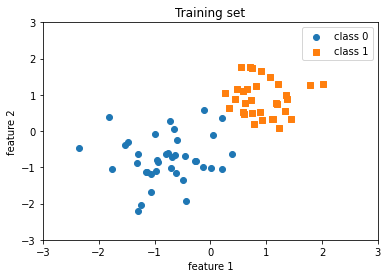

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

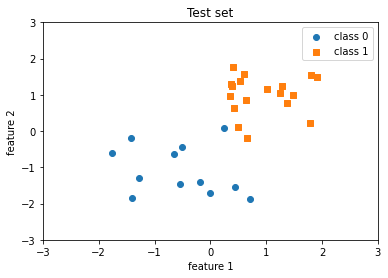

In [ ]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):
            delta_w = torch.zeros(self.num_features, 1,
                                   dtype=torch.float32, device=device)
            delta_b = torch.zeros(1, dtype=torch.float32, device=device)
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                delta_w += (errors * x[i]).reshape(self.num_features, 1)
                delta_b += errors
            self.weights += delta_w
            self.bias += delta_b


    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

Model parameters:
  Weights: tensor([[32.1376],
        [30.9040]])
  Bias: tensor([6.])


In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

train_acc = ppn.evaluate(X_train_tensor, y_train_tensor)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 95.71%


In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 96.67%


## Here I've calculated delta_w and delta_b over the epoch and finally added it to the weight and biase

## The test accuracy is a little greater than that of on-line mode

## Question 2 - Linear algebra equation to compute errors for all samples in the minibatch

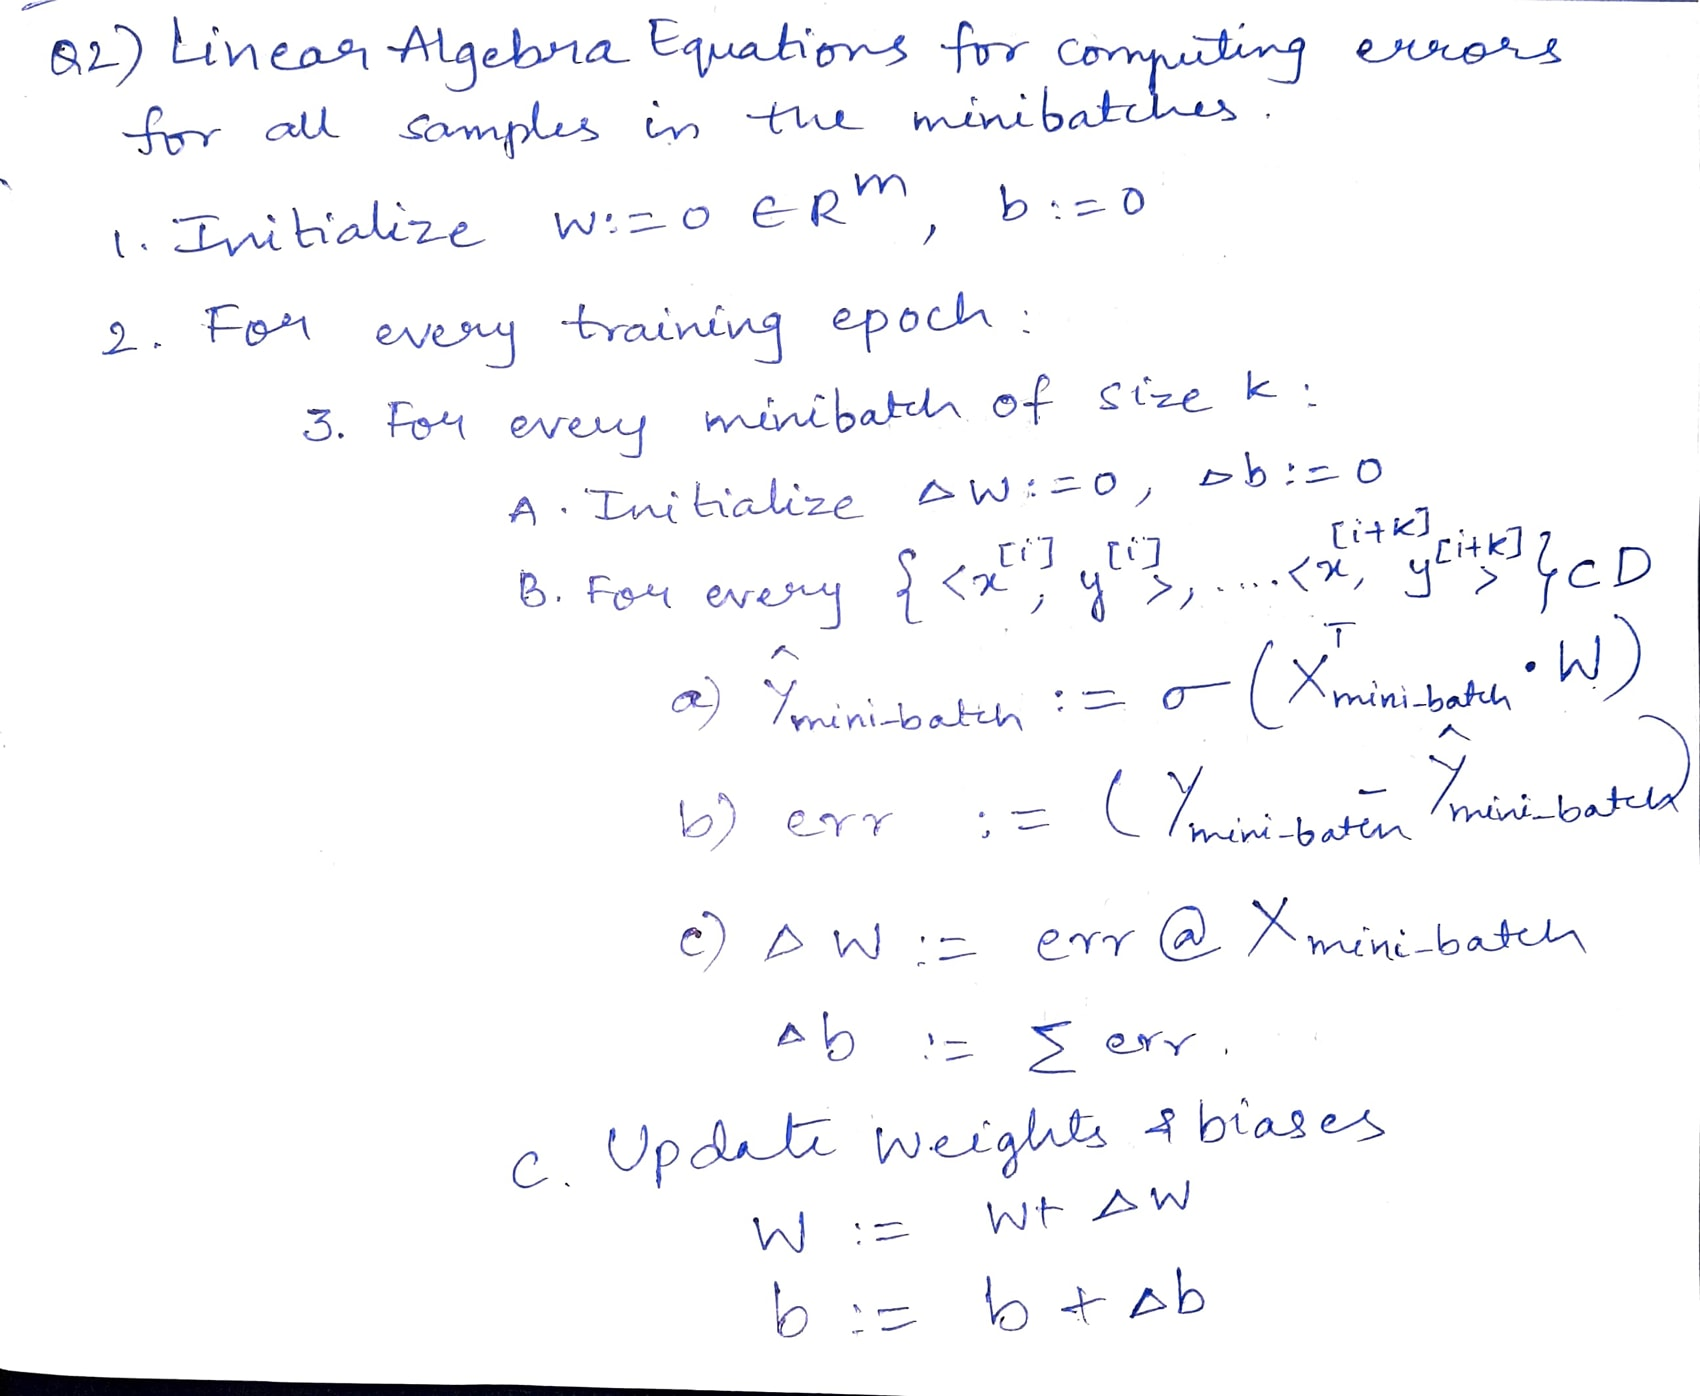

## Here the Xmini_batch (i.e training samples from i to i+k) represents the vector which contains all the elements in the mini batch, since we've vectorized, the error values will be calculated in one operation.

## Question 3 - Training the network with a minibatch of size 10

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)

        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1)
        self.zeros = torch.zeros(1)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):
            current_iteration = 0

            print(f"--------Epoch {e + 1}--------")
            for iter in range(y.shape[0] // 10): # 10 is the batch size

              delta_w = torch.zeros(self.num_features, 1,
                                   dtype=torch.float32, device=device)
              delta_b = torch.zeros(1, dtype=torch.float32, device=device)

              mini_x = x[current_iteration: current_iteration + 10]
              mini_y = y[current_iteration: current_iteration + 10].reshape(10, 1)
              current_iteration += 10

              mini_errors = self.backward(mini_x, mini_y).reshape(1, 10) # 1 x 10


              delta_w += (mini_errors @ mini_x).reshape(self.num_features, 1) # 2 x 1
              delta_b += torch.sum(mini_errors)

              errors_in_mini_batch = mini_errors[mini_errors > 0]

              print(f"errors in mini_batch {iter + 1}", errors_in_mini_batch.shape[0])

            self.weights += delta_w
            self.bias += delta_b


    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('  Weights: %s' % ppn.weights)
print('  Bias: %s' % ppn.bias)

--------Epoch 1--------
errors in mini_batch 1 5
errors in mini_batch 2 3
errors in mini_batch 3 6
errors in mini_batch 4 6
errors in mini_batch 5 3
errors in mini_batch 6 5
errors in mini_batch 7 4
--------Epoch 2--------
errors in mini_batch 1 0
errors in mini_batch 2 0
errors in mini_batch 3 0
errors in mini_batch 4 0
errors in mini_batch 5 0
errors in mini_batch 6 0
errors in mini_batch 7 0
--------Epoch 3--------
errors in mini_batch 1 0
errors in mini_batch 2 0
errors in mini_batch 3 0
errors in mini_batch 4 0
errors in mini_batch 5 0
errors in mini_batch 6 0
errors in mini_batch 7 0
--------Epoch 4--------
errors in mini_batch 1 0
errors in mini_batch 2 0
errors in mini_batch 3 0
errors in mini_batch 4 0
errors in mini_batch 5 0
errors in mini_batch 6 0
errors in mini_batch 7 0
--------Epoch 5--------
errors in mini_batch 1 0
errors in mini_batch 2 0
errors in mini_batch 3 0
errors in mini_batch 4 0
errors in mini_batch 5 0
errors in mini_batch 6 0
errors in mini_batch 7 0
Model

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

train_acc = ppn.evaluate(X_train_tensor, y_train_tensor)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 95.71%


In [ ]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 96.67%


## In this above code I've created a tensor of all the items in a mini batch and I've used vectorization to multiply and get errors.

## I used these errors to calculate weights & biases